In [53]:

from matplotlib import pyplot as plt
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pymongo as pym
from pprint import pprint
import pandas as pd
print(pym.version)
ds = xr.open_dataset('wrfout_d01_0001-01-01_00:00:00')
client = pym.MongoClient('freedman-dev.app.arcc.albany.edu')
#client = pym.MongoClient('mongodb://localhost:27017')

db=client['Israel_project']

col=db['records']

#print(ds)
filename = 'wrfout_d01_0001-01-01_00:00:00'
#print(ds)
records=[]
'''
for x,y,v in zip(
    ds.XLAT.squeeze().values.flatten(),
    ds.XLONG.squeeze().values.flatten(),
    ds['T'].squeeze().values.flatten()
):
    records.append({
        'time': pd.Timestamp('2017-10-30 12:00:000'),
        'long': float(y),
        'lat': float(x),
        'value': float(v),
        'name': 'T'
    })
#print (db.list_collection_names())
# col.insert_many(records)
'''
records.append({
        'time': pd.Timestamp('2017-10-30 12:00:000'),
        'long': float(2.0),
        'lat': float(3.4),
        'value': float(3.5),
        'name': 'T'
    })

# col.insert_many(records)
cursor = col.find({})
for document in cursor: 
    pprint(document)



3.10.1


ServerSelectionTimeoutError: freedman-dev.app.arcc.albany.edu:27017: [Errno 111] Connection refused

In [ ]:

fh = Dataset(filename,mode='r')
t = np.transpose(fh.variables['T'][:])
p = np.transpose(fh.variables['P'][:])
pb = np.transpose(fh.variables['PB'][:])
press = p + pb
temp = (t + 300.)*(press/100000.)**(287.5/1005.)
Temp = temp-273.15

In [99]:
from collections import OrderedDict 
numi = Temp.shape[0]
numj = Temp.shape[1]
numk = Temp.shape[2]
numt = Temp.shape[3]
records = []
records.append({
         'id' : 1,
        'name': 'Temperature',
        'long': float(numi),
        'lat': float(numj),
        'time': float(numk),
        'height': float(numt)
       
    })
col.insert_many(records)
print(records)

ServerSelectionTimeoutError: localhost:27017: [Errno 111] Connection refused

In [125]:
# print(plt.style.available)
# plt.style.use('fivethirtyeight')
# x=list(range(numt))
# y=Temp[0,0,0,:]
# z =Temp[100,3,0,:]
# plt.title('Temperature')
# plt.legend()
# plt.tight_layout()
# plt.plot(x,y,color="#69e7fa",label="Line1")
# plt.plot(x,z,color="#db7900",label="Line2")
# plt.savefig('temp.png')
# plt.show()

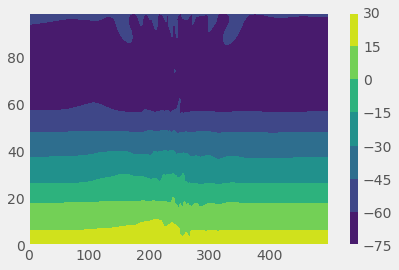

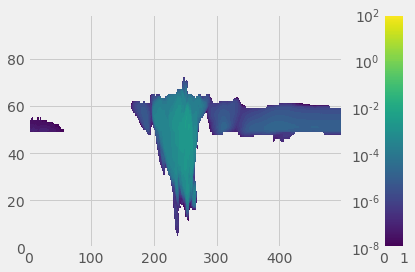

In [126]:
t = np.transpose(fh.variables['T'][:])
p = np.transpose(fh.variables['P'][:])
pb = np.transpose(fh.variables['PB'][:])
press = p + pb
temp = (t + 300.)*(press/100000.)**(287.5/1005.)
Temp = temp-273.15
numi = Temp.shape[0]
numj = Temp.shape[1]
numk = Temp.shape[2]
numt = Temp.shape[3]
xx = np.zeros((numi,numj,numk,numt))
yy = np.zeros((numi,numj,numk,numt))
for i in range(numi):
    xx[i,:,:,:] = i
for k in range(numk):
    yy[:,:,k,:] = k

x=xx[:,0,:,1]
y=yy[:,0,:,1]
z=Temp[:,0,:,1]

plt.contourf(x,y,z)
plt.colorbar()
plt.show()

numt = Temp.shape[3]

x=list(range(numt))
y=Temp[0,0,0,:]
xx = np.zeros((numi,numj,numk,numt))
yy = np.zeros((numi,numj,numk,numt))
for i in range(numi):
    xx[i,:,:,:] = i
for k in range(numk):
    yy[:,:,k,:] = k

x=xx[:,0,:,1]
y=yy[:,0,:,1]
z=Temp[:,0,:,1]

qi = np.transpose(fh.variables['QICE'][:])
z=qi[:,0,:,1]

import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
gs = gridspec.GridSpec(1,2,width_ratios=[15,1],hspace=0.25,wspace=0.25)

ax = plt.subplot(gs[0])
logmin = -8
logmax = 2
it = 40
n_levels = logmax - logmin
C = ax.contourf(x,y,z,norm=LogNorm(),levels=np.logspace(logmin,logmax,it))

ax1 = plt.subplot(gs[1])
cblvls = np.linspace(10**logmin,10**(logmin+1),it)

for E in range(1,n_levels):
    cblvls = np.concatenate((cblvls[:-1],np.linspace(10**(logmin+E),10**(logmin+E+1),it)))
XC = [np.zeros(len(cblvls)),np.ones(len(cblvls))]
YC = [cblvls,cblvls]
CM = ax1.contourf(XC,YC,YC,levels=cblvls,norm=LogNorm())
ax1.set_yscale('log')
plt.savefig('colorful.png')
plt.show()



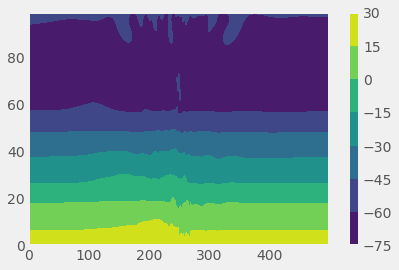

In [159]:
xx = np.zeros((numi,numj,numk,numt))
yy = np.zeros((numi,numj,numk,numt))
for i in range(numi):
    xx[i,:,:,:] = i
for k in range(numk):
    yy[:,:,k,:] = k

x=xx[:,70,:,1]
y=yy[:,44,:,1]
z=Temp[:,33,:,1]

plt.contourf(x,y,z)
plt.savefig('fungraph.png')
plt.colorbar()
plt.show()